---
# Exercício Pré-processamento (car dataset) - codificação de dados categóricos 
---
**Machine Learning em Projetos (Erick Muzart e Fernando Melo)**   
Tópicos:
- One-hot encoding    
- Ordinal encoding
- Manual encoding   

**Fonte dados:**
Car Evaluation Data Set: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation


### categóricos nominais

Car Evaluation Data Set: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

|   var   |     níveis             |
|---------|------------------------|
| buying  | v-high, high, med, low |
| maint   | v-high, high, med, low |
| doors   | 2, 3, 4, 5more         |
| persons | 2, 4, more             |
| lug_boot| small, med, big        |
| safety  | low, med, high         |
|-------- |------------------------|
| car     |unacc, acc, good, v-good|

 
Class Distribution (number of instances per class)

| class | N  | N(%) |
|-------|----|------|
|unacc  |1210|70%   |
|  acc  |384 |22%   |
| good  | 69 | 4%   |
|v-good | 65 | 4%   |


### **Descrição do projeto de machine learning**
Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação  simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.  
  
**1- Descrição do problema ou tarefa:**  
Prever a avaliação de compra de um determinado carro com base nas suas características.  
**2- Descrição da solução de IA:**   
Treinamento supervisionado de modelo de classificação da avaliação de compra do carro em 4 classes: inaceitável, aceitável, bom e muito bom (unacc, acc, good, v-good), com base nas características do veículo.   
**3- Fonte de dados:**  
Car Evaluation Data Set: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation   
**4- Variáveis independentes (preditoras ou "features"):**  
'buying', maint', 'doors', 'persons', 'lug_boot', 'safety'.     
**5- Variável dependente (resposta ou "target"):**   
car (unacc, acc, good, v-good)  

----------------------------------------------------------- 

## Carregar bibliotecas de código

In [3]:
# Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix 
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics

## Análise exploratória do dados

In [4]:
# Ler os dados
# Pode-se usar diretamente a função read_csv() do pandas para ler o dataset remoto
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', header=None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Atribuir nomes mais explicativos para as colunas do dataset
df.columns = ['buying','maint', 'doors', 'persons', 'lug_boot', 'safety', 'car']
# Mostrar as dimensões do dataset
print('Dimensões do dataset: ', df.shape)
# Mostrar as primeiras linhas do dataset
df.tail()

Dimensões do dataset:  (1728, 7)


,buying,maint,doors,persons,lug_boot,safety,car
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [6]:
# Mostrar os tipos das variáveis do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Podemos observar acima que:
- Todas as variáveis são do tipo categórico (Dtype = Object).   
- Não existem dados faltantes (nulos).

In [7]:
# Mostrar a descrição da estatísticas das variáveis independentes (features)
df.describe()

,buying,maint,doors,persons,lug_boot,safety,car
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,2,2,med,med,unacc
freq,432,432,432,576,576,576,1210


In [8]:
# Mostra o nome das colunas do dataset
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'car'], dtype='object')

unacc    1210
acc       384
good       69
vgood      65
Name: car, dtype: int64


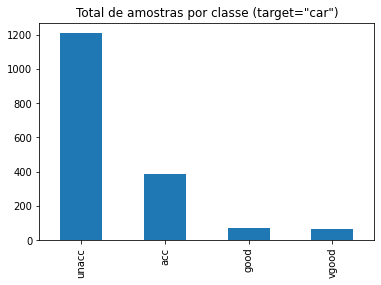

In [9]:
# Mostra o total de amostras por classe da variável dependente (target)
print(df.car.value_counts())
df.car.value_counts().plot(kind='bar', title='Total de amostras por classe (target="car")');

Podemos observar acima que:
- As classes estão bastante desbalanceadas.

**Já podemos treinar um primeiro modelo?**

In [10]:
# # Instanciar modelo de regressão logística
# reg_logistica = LogisticRegression()
# # Atribuir valores a X e y
# X = df.iloc[:,:-1]
# y = df['car']
# # Treinar modelo
# reg_logistica.fit(X, y)

**Por que deu erro ?**  
Todas os dados de treinamento precisam ser obrigatoriamente **números**.  
Portanto, precisamos codificar todos os caracteres em números. 

## Preparação dos dados

In [11]:
# atribuir os valores das variáveis independentes a 'X'
X = df.iloc[:, :-1]
# atribuir os valores da variável dependente a 'y'
y = df.car
# Mostrar as dimensões de X e y
print('Dimensões de X = ', X.shape)
print('Dimensões de y = ', y.shape)

Dimensões de X =  (1728, 6)
Dimensões de y =  (1728,)


In [12]:
# Dividir o dataset entre treino e teste (85/15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0, stratify = y)
print('Dimensões de X_train = ', X_train.shape)
print('Dimensões de X_test = ', X_test.shape)

Dimensões de X_train =  (1468, 6)
Dimensões de X_test =  (260, 6)


In [13]:
print('Amostras de treino= ', y_train.shape[0])
y_train.value_counts()

Amostras de treino=  1468


unacc    1028
acc       326
good       59
vgood      55
Name: car, dtype: int64

In [14]:
print('Amostras de teste= ', y_test.shape[0])
y_test.value_counts()

Amostras de teste=  260


unacc    182
acc       58
good      10
vgood     10
Name: car, dtype: int64

### Codificação das variáveis independentes


#### 1- Pandas Get Dummies


In [15]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,car
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [16]:
# Codificando com get_dummies
df_getdummies = pd.get_dummies(X_train)
print('Dimensões do dataset com get_dummies: ', df_getdummies.shape)
df_getdummies.head()

Dimensões do dataset com get_dummies:  (1468, 21)


,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
818,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1004,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
980,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0
844,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1
1700,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


#### 2- One-hot encoder do Sklearn


In [17]:
from sklearn.preprocessing import OneHotEncoder
onehotenc = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [18]:
onehotenc.fit(X_train)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [19]:
onehotenc.categories_

[array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['2', '3', '4', '5more'], dtype=object),
 array(['2', '4', 'more'], dtype=object),
 array(['big', 'med', 'small'], dtype=object),
 array(['high', 'low', 'med'], dtype=object)]

In [20]:
df_onehotenc = pd.DataFrame(onehotenc.fit_transform(X_train))
print('Dimensões do dataset com sklearn onehotenc: ', df_onehotenc.shape)
df_onehotenc.head()


Dimensões do dataset com sklearn onehotenc:  (1468, 21)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


#### 3- Ordinal Encoder

In [21]:
# Codificando com OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
ordenc = OrdinalEncoder()

In [22]:
df_ordenc = pd.DataFrame(ordenc.fit_transform(X_train))
df_ordenc.head()

,0,1,2,3,4,5
0,0.0,1.0,2.0,0.0,0.0,0.0
1,2.0,0.0,1.0,0.0,1.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,3.0,0.0,0.0,2.0
4,1.0,1.0,2.0,2.0,0.0,0.0


In [23]:
df_ordenc.columns = ['buying','maint', 'doors', 'persons', 'lug_boot', 'safety']
print('Dimensões do dataset com OrdinalEncoder: ', df_ordenc.shape)
df_ordenc.head()

Dimensões do dataset com OrdinalEncoder:  (1468, 6)


,buying,maint,doors,persons,lug_boot,safety
0,0.0,1.0,2.0,0.0,0.0,0.0
1,2.0,0.0,1.0,0.0,1.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,3.0,0.0,0.0,2.0
4,1.0,1.0,2.0,2.0,0.0,0.0


In [24]:
ordenc.categories_

[array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['high', 'low', 'med', 'vhigh'], dtype=object),
 array(['2', '3', '4', '5more'], dtype=object),
 array(['2', '4', 'more'], dtype=object),
 array(['big', 'med', 'small'], dtype=object),
 array(['high', 'low', 'med'], dtype=object)]

Conclusões sobre o Ordinal Encoder :   
- O ordinal encoder utilizou a ordem lexicográfica para codificação dos valores das variáveis, resultando numa péssima conversão. Isto irá prejudicar o desempenho do modelo.   
Por exemplo:    
"safety" : high=0, low=1 e med=2.   
o correto seria: low=0, med=1 e high=2.    
- Sempre confira o resultado, principalmente, do Ordinal encoder!

#### 4- Manual Enconding


In [25]:
# Mostra os valores únicos de cada variável para (fazer loop) 
for col in df:
  print(col,':',df[col].unique())

buying : ['vhigh' 'high' 'med' 'low']
maint : ['vhigh' 'high' 'med' 'low']
doors : ['2' '3' '4' '5more']
persons : ['2' '4' 'more']
lug_boot : ['small' 'med' 'big']
safety : ['low' 'med' 'high']
car : ['unacc' 'acc' 'vgood' 'good']


In [26]:
# A ordem das categorias não foi respeitada no Ordinal encoder acima.
# Façamos um encoding manual, respeitando essas ordens relativas.
# Criar dicionário para codificar os dados das colunas com o comando replace
encoding = {
    'low': 0,
    'small': 0,
    'med': 1,
    'high': 2,
    'big': 2,
    '2': 0,
    '3': 1,
    '4': 2,
    'more': 3,
    '5more': 3,
    'vhigh': 3
}

In [27]:
dic ={'2': 0,
      '4': 1,
      'more': 2}
df_manualenc = pd.DataFrame(X.persons.replace(dic))

In [28]:
# Mostre as primeiras linhas de X para poder visualizar a diferença quando executar o comando na célula abaixo
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [29]:
# Criar um novo dataframe com a codificação do Manual encoding (usando replace) e mostrar as primeiras linhas e dimensões
df_manualenc = pd.DataFrame(X.replace(encoding))
df_manualenc.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,0,0
1,3,3,0,0,0,1
2,3,3,0,0,0,2
3,3,3,0,0,1,0
4,3,3,0,0,1,1


## Treinar o modelo
Vamos treinar um modelo de regressão Logística para ver qual codificação (encoder) dará o melhor resultado.

### Regressão Logística

In [30]:
# Instanciar modelo de regressão logística
reg_log = LogisticRegression(max_iter=1000)

#### 1- Reg_log Pandas Get Dummies

In [51]:
# Dividir o dataset entre treino e teste (85/15), usar stratify pois as classes estão desbalanceadas
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X), y, test_size = 0.15, random_state = 0, stratify = y)

In [52]:
# Treinar o modelo, lembrando de aplicar o encoder nos dados de treinamento
reg_log.fit(pd.get_dummies(X_train), y_train)

LogisticRegression(max_iter=1000)

In [53]:
# Verificar a acurácia do modelo (.score), lembrando de aplicar o get_dummies encoder nos dados de teste
reg_log.score(pd.get_dummies(X_test), y_test)

0.9115384615384615

In [54]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas, lembrando de aplicar o get_dummies encoder nos dados de teste
metrics.f1_score(y_test, reg_log.predict(pd.get_dummies(X_test)), average='weighted')

0.90370334540295

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


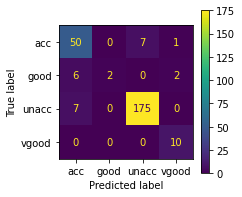

In [55]:
# Mostrar a Matriz de Confusão, lembrando de aplicar o get_dummies encoder nos dados de teste
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(reg_log, pd.get_dummies(X_test), y_test, ax=ax, values_format='d');

#### 2- Reg_log OneHotEncoder do Sklearn

In [36]:
# Dividir o dataset entre treino e teste (85/15)
X_train, X_test, y_train, y_test = train_test_split(onehotenc.fit_transform(X), y, test_size = 0.15, random_state = 0, stratify = y)

In [37]:
# Treinar o modelo, lembrando de aplicar o encoder nos dados de treinamento
reg_log.fit(onehotenc.fit_transform(X_train), y_train)

LogisticRegression(max_iter=1000)

In [38]:
# Verificar a acurácia do modelo (.score)
reg_log.score(onehotenc.fit_transform(X_test), y_test)

0.9192307692307692

In [39]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas
metrics.f1_score(y_test, reg_log.predict(onehotenc.fit_transform(X_test)), average='weighted')

0.9171694744883914

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


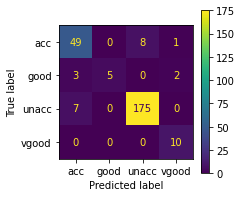

In [40]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(reg_log, onehotenc.fit_transform(X_test), y_test, ax=ax, values_format='d');

#### 3- Reg_log Ordinal Encoder

In [41]:
# Dividir o dataset entre treino e teste (85/15)
X_train, X_test, y_train, y_test = train_test_split(ordenc.fit_transform(X), y, test_size = 0.15, random_state = 0, stratify = y)

In [42]:
# Treinar o modelo, lembrando de aplicar o encoder nos dados de treinamento
reg_log.fit(ordenc.fit_transform(X_train), y_train)

LogisticRegression(max_iter=1000)

In [43]:
# Verificar a acurácia do modelo (.score)
reg_log.score(ordenc.fit_transform(X_test), y_test)

0.6884615384615385

In [44]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas
metrics.f1_score(y_test, reg_log.predict(ordenc.fit_transform(X_test)), average='weighted')

0.6158788170267696

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


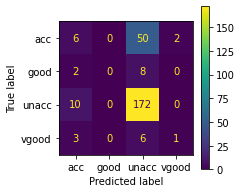

In [45]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(reg_log, ordenc.fit_transform(X_test), y_test, ax=ax, values_format='d');

#### 4- Reg_log Manual Encoding

In [46]:
# Dividir o dataset entre treino e teste (85/15)
X_train, X_test, y_train, y_test = train_test_split(df_manualenc, y, test_size = 0.15, random_state = 0, stratify = y)

In [47]:
# Treinar o modelo, lembrando de aplicar o encoder nos dados de treinamento
reg_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [48]:
# Verificar a acurácia do modelo (.score)
reg_log.score(X_test, y_test)

0.8115384615384615

In [49]:
# Verificar o f1_score do modelo, quando as classes estão desbalenceadas
metrics.f1_score(y_test, reg_log.predict(X_test), average='weighted')

0.8005758340917863

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


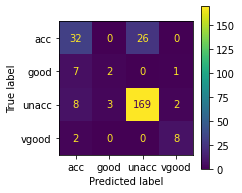

In [50]:
# Mostrar a Matriz de Confusão para os diversos patamares de renda familiar
fig, ax = plt.subplots(figsize=(3,3))
plot_confusion_matrix(reg_log, X_test, y_test, ax=ax, values_format='d');

## Avaliação da qualidade do melhor modelo

## Conclusão

No nosso experimento, treinamos modelos de regressão logística sobre os dados de aceitabilidade de carros com diferentes codificações, gerando os seguintes resultados:
- pandas get_dummies: 90,3% (f1-score)
- one-hot encoding: 91,7% (f1-score)
- ordinal encoding (sem seguir a ordem das categorias): 61,5% (f1-score)
- manual encoding (substituição), seguindo a ordem relativa das categorias: 80,0% (f1-score)